In [57]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [63]:
x_train = np.random.random((100, 100, 100, 3))
y_train = np.random.randint(10, size=(100, 1))
x_test = np.random.random((20, 100, 100, 3))
y = np.random.randint(10, size=(20, 1))

[3]


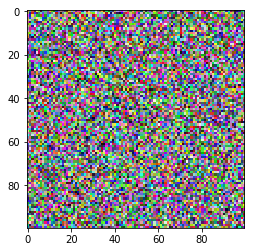

In [72]:
import matplotlib.pyplot as plt
this = 60
plt.imshow(x_train[this])
print(y_train[this])

In [73]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100, 100, 100, 3) (100, 1) (20, 100, 100, 3) (20, 10)


In [74]:
# convert to class labels
y_train = keras.utils.to_categorical(x, num_classes=10)
y_test = keras.utils.to_categorical(y, num_classes=10)

In [75]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100, 100, 100, 3) (100, 10) (20, 100, 100, 3) (20, 10)


In [101]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 64)        0         
__________

In [95]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [96]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
100/100 [==============================] - 6s 61ms/step - loss: 2.3304 - acc: 0.0300
Epoch 2/10
100/100 [==============================] - 5s 51ms/step - loss: 2.3282 - acc: 0.1300
Epoch 3/10
100/100 [==============================] - 5s 50ms/step - loss: 2.3439 - acc: 0.0700
Epoch 4/10
100/100 [==============================] - 5s 49ms/step - loss: 2.3049 - acc: 0.0900
Epoch 5/10
100/100 [==============================] - 5s 48ms/step - loss: 2.2983 - acc: 0.1300
Epoch 6/10
100/100 [==============================] - 6s 58ms/step - loss: 2.2956 - acc: 0.1300
Epoch 7/10
100/100 [==============================] - 5s 49ms/step - loss: 2.2931 - acc: 0.1300
Epoch 8/10
100/100 [==============================] - 6s 59ms/step - loss: 2.2891 - acc: 0.1200
Epoch 9/10
100/100 [==============================] - 5s 55ms/step - loss: 2.2831 - acc: 0.1300
Epoch 10/10
100/100 [==============================] - 5s 51ms/step - loss: 2.2874 - acc: 0.1300


In [97]:
score = model.evaluate(x_test, y_test, batch_size=16)

20/20 [==============================] - 0s 22ms/step


In [98]:
print(score)

[2.4006011486053467, 0.0]


In [99]:
weights = model.get_weights()

In [100]:
len(weights)

12